In [1]:
import numpy as np
import scipy.sparse as sp
import nmarkov as nm
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
st.expon.pdf(1,scale=2)

0.3032653298563167

In [3]:
nm.deformula().integrate(st.gamma.pdf, (0,np.inf), scale=2, a=10)

(0.9999999999999242,
 array([  0.45841481,   0.48014578,   0.50264661,   0.52594655,
          0.5500771 ,   0.57507217,   0.60096835,   0.62780505,
          0.65562477,   0.68447333,   0.71440014,   0.74545851,
          0.77770592,   0.81120438,   0.84602082,   0.88222747,
          0.9199023 ,   0.95912949,   1.        ,   1.04261208,
          1.08707197,   1.13349451,   1.182004  ,   1.23273496,
          1.28583309,   1.34145628,   1.39977575,   1.46097731,
          1.5252627 ,   1.59285116,   1.66398114,   1.73891217,
          1.81792699,   1.90133388,   1.9894693 ,   2.08270082,
          2.18143039,   2.28609803,   2.39718593,   2.51522309,
          2.64079051,   2.7745271 ,   2.91713621,   3.06939317,
          3.23215371,   3.40636349,   3.59306904,   3.79343002,
          4.00873326,   4.24040883,   4.49004821,   4.75942526,
          5.05052013,   5.36554672,   5.70698429,   6.0776138 ,
          6.48055991,   6.91933952,   7.39791792,   7.92077407,
          8.4929764

In [4]:
nm.deformula().integrate(st.gamma.pdf, (0,10), scale=2, a=10)

(0.03182805730618023,
 array([ 0.48493359,  0.70215471,  0.98600629,  1.34490983,  1.78411621,
         2.30426647,  2.90023944,  3.56060034,  4.26791008,  5.        ,
         5.73208992,  6.43939966,  7.09976056,  7.69573353,  8.21588379,
         8.65509017,  9.01399371,  9.29784529,  9.51506641,  9.67580429,
         9.79068011,  9.86983434,  9.92229416,  9.95563496,  9.97588013,
         9.98757428,  9.99396767,  9.99725717,  9.99883986,  9.99954692,
         9.99983797,  9.99994741,  9.99998466,  9.99999602,  9.99999909,
         9.99999982,  9.99999997, 10.        , 10.        , 10.        ,
        10.        ]),
 array([6.25369821e-12, 2.08684357e-10, 4.94515512e-09, 8.40638529e-08,
        1.03423292e-06, 9.29276993e-06, 6.16375034e-05, 3.05900211e-04,
        1.15529613e-03, 3.38860327e-03, 7.90005857e-03, 1.50091402e-02,
        2.38352243e-02, 3.24234239e-02, 3.86418688e-02, 4.11556695e-02,
        3.98348031e-02, 3.55226159e-02, 2.95008465e-02, 2.30024857e-02,
        1.6

In [5]:
import functools

In [6]:
Q=sp.csc_matrix(np.array([[-5,2,3],[2,-3,1],[1,1,-2]], dtype=np.float))
dQ = np.array([[-1,1,0],[0,0,0],[0,0,0]], dtype=np.float)

In [7]:
x0=np.array([1,0,0])
t=np.linspace(0, 1, num=100)
rwd=np.array([1,10,0])

In [8]:
v=nm.tprob(Q=Q, x0=x0, t=t)

In [9]:
x=nm.trwd(Q=Q, x0=x0, t=t, rwd=rwd, trans=False)

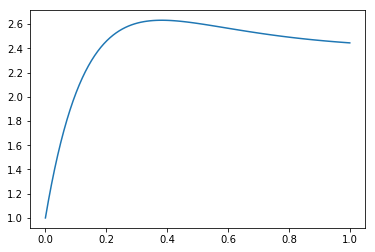

In [10]:
plt.plot(x['t'], x['irwd'])
plt.show()

In [11]:
pis = nm.sprob(Q)
print(pis)

[0.2173913  0.30434783 0.47826087]


In [12]:
nm.ssen(Q, b=pis @ dQ, pis=pis)

array([-0.02835539,  0.04725898, -0.01890359])

In [13]:
nm.nctmc(Q).mexpAx_mix(f=st.gamma.pdf, scale=0.01, a=1)

array([[0.84116745, 0.06327712, 0.09555543],
       [0.06071808, 0.89804698, 0.04123494],
       [0.03355783, 0.03611687, 0.9303253 ]])

In [14]:
Q11=nm.array([[-5,2,3],[2,-3,1],[1,1,-2]])
Q12=nm.eye(3)
Q2=nm.zeros((3,6))

In [15]:
Q = nm.rblock(nm.cblock(Q11, Q12), Q2)
Q.tocoo().toarray()

array([[-5.,  2.,  3.,  1.,  0.,  0.],
       [ 2., -3.,  1.,  0.,  1.,  0.],
       [ 1.,  1., -2.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])